# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences

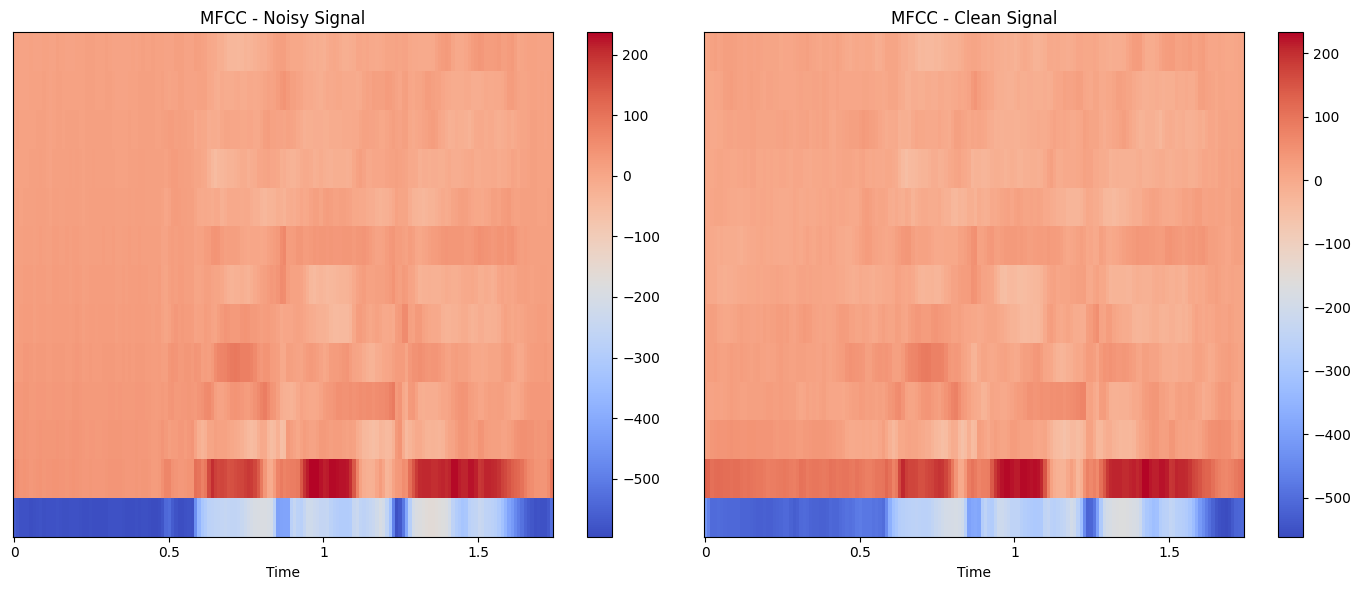

Mean MFCC - Noisy Signal:
 [-400.41858    102.394485    10.470032    25.018925    23.615515
    8.740904     4.6809425   21.438303     2.6346135   -0.8205256
    3.1148038    4.9494934    2.9481127]
Standard Deviation MFCC - Noisy Signal:
 [162.35408   81.602486  28.49547   20.704084  20.593155  20.597292
  20.508226  11.072063  15.979929  15.596507  11.850519  10.975636
  14.547604]

Mean MFCC - Clean Signal:
 [-367.7627     126.117714    10.656117    22.120779    21.972944
    8.436039    -1.446904    16.65211      0.7107679   -2.67378
    4.0363207    5.001364     3.104083 ]
Standard Deviation MFCC - Clean Signal:
 [132.15347    64.83135    28.286438   19.557888   21.789997   18.038893
  17.465748   14.00676    13.942162   13.0433235  11.899309   11.025706
  14.3738165]


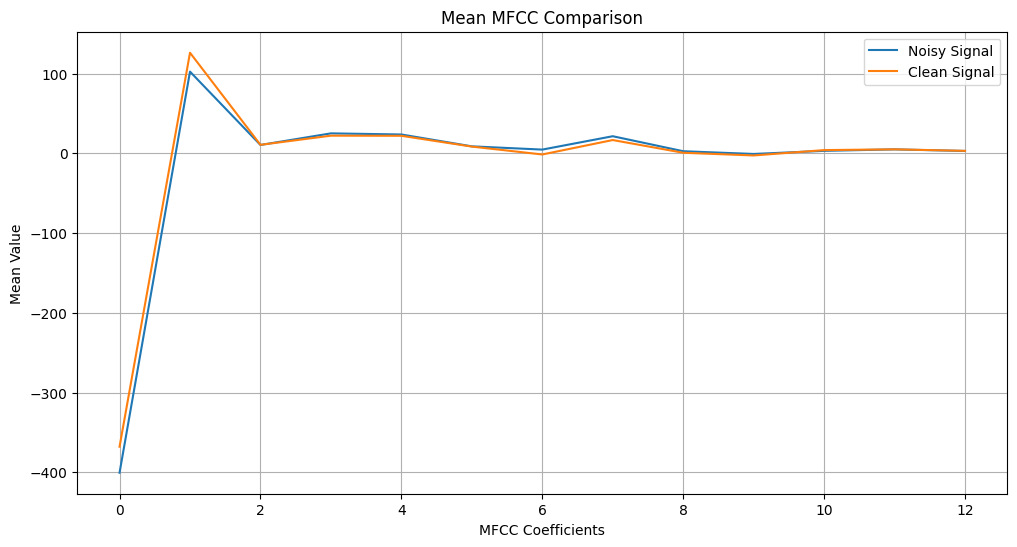

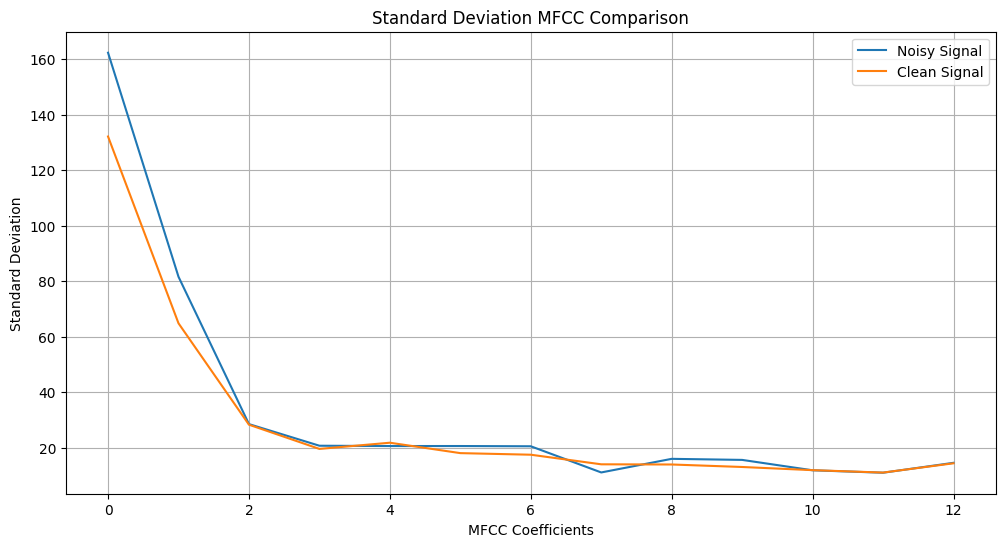

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Load the noisy and clean signals
noisy_signal_path = '/content/Clean-Signal.wav'
clean_signal_path = '/content/Noisy-Signal.wav'

noisy_signal, sr_noisy = librosa.load(noisy_signal_path, sr=None)
clean_signal, sr_clean = librosa.load(clean_signal_path, sr=None)

# Check if both signals have the same sampling rate
assert sr_noisy == sr_clean, "Sampling rates are different!"

# Compute MFCCs
mfcc_noisy = librosa.feature.mfcc(y=noisy_signal, sr=sr_noisy, n_mfcc=13)
mfcc_clean = librosa.feature.mfcc(y=clean_signal, sr=sr_clean, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc_noisy, sr=sr_noisy, x_axis='time')
plt.colorbar()
plt.title('MFCC - Noisy Signal')

plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc_clean, sr=sr_clean, x_axis='time')
plt.colorbar()
plt.title('MFCC - Clean Signal')

plt.tight_layout()
plt.show()

# Compute the mean and standard deviation of the MFCCs
mean_mfcc_noisy = np.mean(mfcc_noisy, axis=1)
std_mfcc_noisy = np.std(mfcc_noisy, axis=1)

mean_mfcc_clean = np.mean(mfcc_clean, axis=1)
std_mfcc_clean = np.std(mfcc_clean, axis=1)

# Report the differences
print("Mean MFCC - Noisy Signal:\n", mean_mfcc_noisy)
print("Standard Deviation MFCC - Noisy Signal:\n", std_mfcc_noisy)
print("\nMean MFCC - Clean Signal:\n", mean_mfcc_clean)
print("Standard Deviation MFCC - Clean Signal:\n", std_mfcc_clean)

# Plot the differences in means
plt.figure(figsize=(12, 6))
plt.plot(mean_mfcc_noisy, label='Noisy Signal')
plt.plot(mean_mfcc_clean, label='Clean Signal')
plt.title('Mean MFCC Comparison')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the differences in standard deviations
plt.figure(figsize=(12, 6))
plt.plot(std_mfcc_noisy, label='Noisy Signal')
plt.plot(std_mfcc_clean, label='Clean Signal')
plt.title('Standard Deviation MFCC Comparison')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()




### Trimming and Processing the Signal
- The >Example.wav file contains is of a very large length.
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC
- Observe the Changes



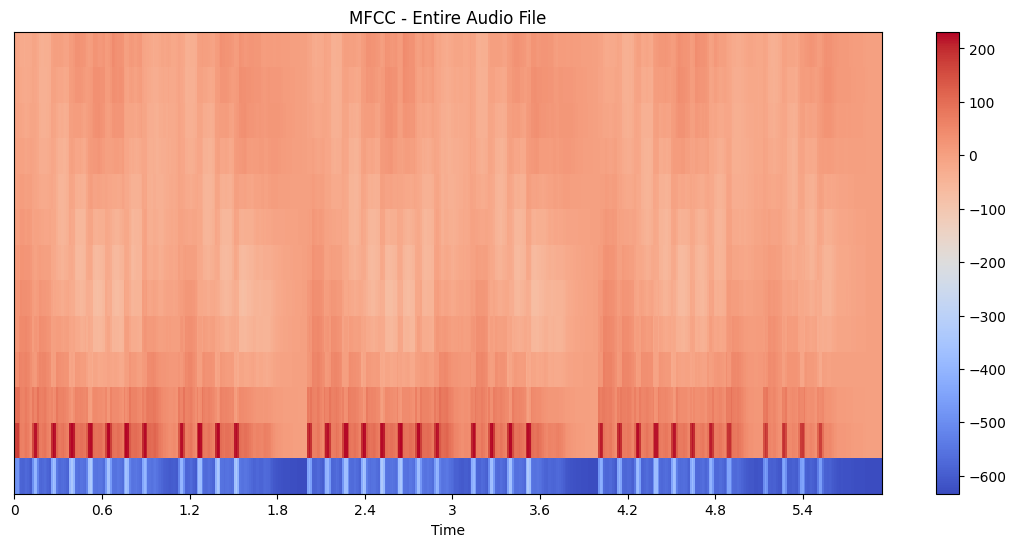

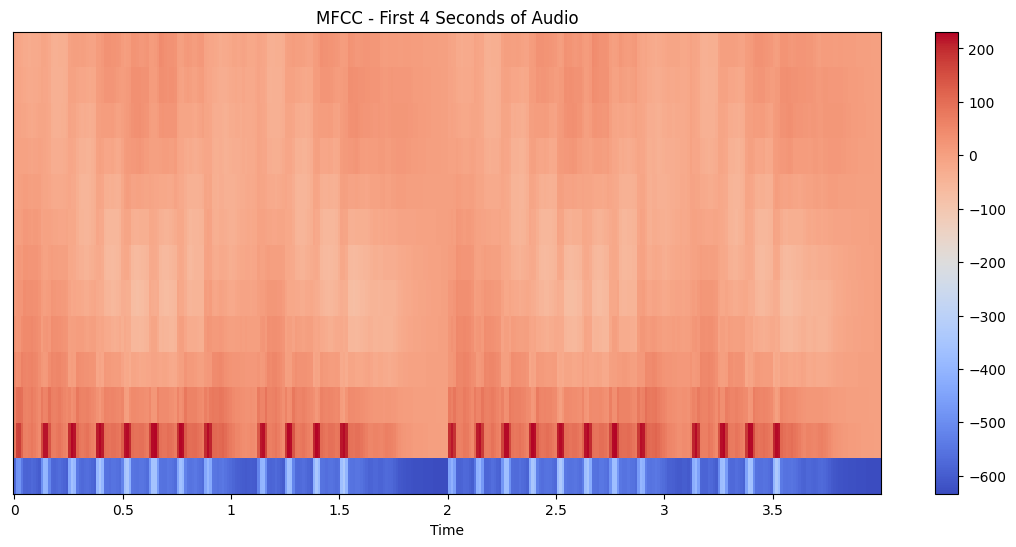

MFCC - Entire Audio File:
 [[-574.7977    -489.5921    -482.3936    ... -633.57904   -633.57904
  -633.57904  ]
 [  78.06057    168.1011     175.84808   ...    0.           0.
     0.       ]
 [  64.36807     93.53607     97.2541    ...    0.           0.
     0.       ]
 ...
 [  -4.7260714   -7.3142204   -7.7560554 ...    0.           0.
     0.       ]
 [  -5.784772   -10.791282   -11.716799  ...    0.           0.
     0.       ]
 [  -6.5496893  -11.652539   -12.639818  ...    0.           0.
     0.       ]]

MFCC - First 4 Seconds of Audio:
 [[-5.7479773e+02 -4.8959210e+02 -4.8239359e+02 ... -6.3248566e+02
  -6.3323865e+02 -6.3357904e+02]
 [ 7.8060570e+01  1.6810110e+02  1.7584808e+02 ...  1.2684062e+00
   3.9701667e-01  0.0000000e+00]
 [ 6.4368073e+01  9.3536072e+01  9.7254097e+01 ...  5.3486896e-01
   1.7327935e-01  0.0000000e+00]
 ...
 [-4.7260714e+00 -7.3142204e+00 -7.7560554e+00 ...  1.5070381e+00
   4.6403122e-01  0.0000000e+00]
 [-5.7847719e+00 -1.0791282e+01 -1.1716799e+01

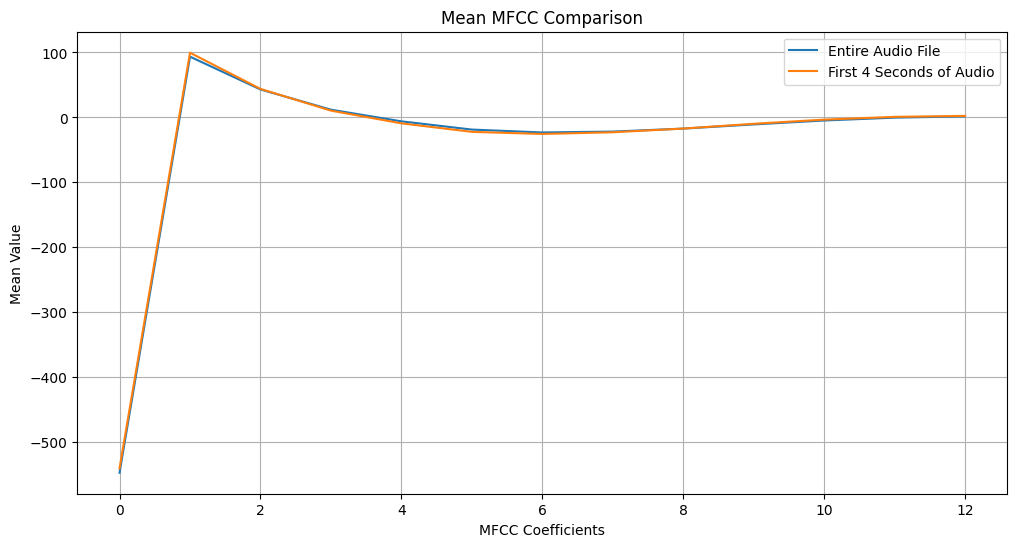

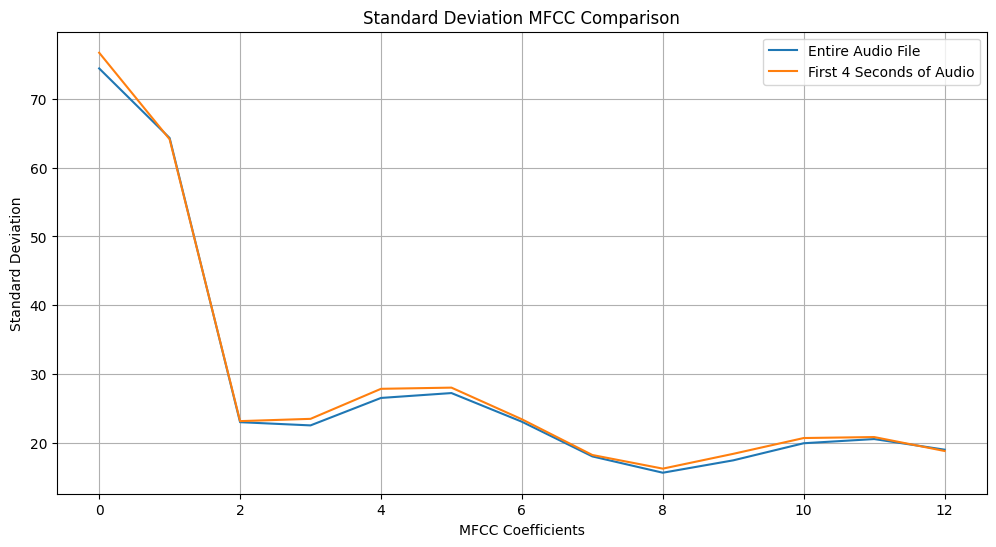

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the example audio file
example_signal_path = '/content/Example.wav'
example_signal, sr_example = librosa.load(example_signal_path, sr=None)

# Compute MFCC for the entire audio file
mfcc_example = librosa.feature.mfcc(y=example_signal, sr=sr_example, n_mfcc=13)

# Plot MFCC for the entire audio file
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc_example, sr=sr_example, x_axis='time')
plt.colorbar()
plt.title('MFCC - Entire Audio File')
plt.show()

# Trim the first 4 seconds of audio
trim_duration = 4  # seconds
trimmed_signal = example_signal[:trim_duration * sr_example]

# Compute MFCC for the trimmed audio file
mfcc_trimmed = librosa.feature.mfcc(y=trimmed_signal, sr=sr_example, n_mfcc=13)

# Plot MFCC for the trimmed audio file
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc_trimmed, sr=sr_example, x_axis='time')
plt.colorbar()
plt.title('MFCC - First 4 Seconds of Audio')
plt.show()

# Report the differences
print("MFCC - Entire Audio File:\n", mfcc_example)
print("\nMFCC - First 4 Seconds of Audio:\n", mfcc_trimmed)

# Compute the mean and standard deviation of the MFCCs
mean_mfcc_example = np.mean(mfcc_example, axis=1)
std_mfcc_example = np.std(mfcc_example, axis=1)

mean_mfcc_trimmed = np.mean(mfcc_trimmed, axis=1)
std_mfcc_trimmed = np.std(mfcc_trimmed, axis=1)

# Report the differences
print("Mean MFCC - Entire Audio File:\n", mean_mfcc_example)
print("Standard Deviation MFCC - Entire Audio File:\n", std_mfcc_example)
print("\nMean MFCC - First 4 Seconds of Audio:\n", mean_mfcc_trimmed)
print("Standard Deviation MFCC - First 4 Seconds of Audio:\n", std_mfcc_trimmed)

# Plot the differences in means
plt.figure(figsize=(12, 6))
plt.plot(mean_mfcc_example, label='Entire Audio File')
plt.plot(mean_mfcc_trimmed, label='First 4 Seconds of Audio')
plt.title('Mean MFCC Comparison')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the differences in standard deviations
plt.figure(figsize=(12, 6))
plt.plot(std_mfcc_example, label='Entire Audio File')
plt.plot(std_mfcc_trimmed, label='First 4 Seconds of Audio')
plt.title('Standard Deviation MFCC Comparison')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()
